In [8]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('howpop_train.csv')

In [10]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [11]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [13]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/313532/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [14]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [15]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [16]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 18 columns):
url            134137 non-null object
domain         134137 non-null object
post_id        134137 non-null int64
published      134137 non-null datetime64[ns]
author         97657 non-null object
flow           97048 non-null object
polling        134137 non-null bool
content_len    134137 non-null int64
title          134137 non-null object
comments       134137 non-null int64
favs           134137 non-null int64
views          134137 non-null int64
votes_plus     133566 non-null float64
votes_minus    133566 non-null float64
year           134137 non-null int64
month          134137 non-null int64
dayofweek      134137 non-null int64
hour           134137 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(9), object(5)
memory usage: 17.5+ MB
None


In [18]:
# задание 1 -  В каком месяце (и какого года) было больше всего публикаций?

In [19]:
# визуализируем активность по годам, чтобы найти год, в который было больше всего публикаций

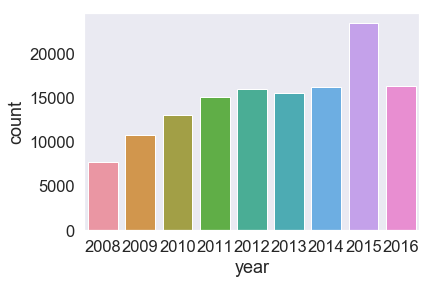

In [20]:
sns.countplot(df['year'])

In [21]:
# визуализируем активность по месяцам года с наибольшим количеством публикаций. Как можно заметить, ответ - март 2015 года.

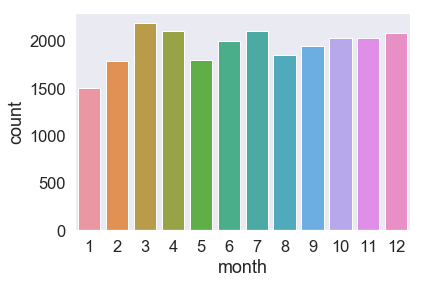

In [22]:
year_15 = df[(df['year'] == 2015)]
sns.countplot(year_15['month'])

In [23]:
# здесь мы видим, что на хабре всегда больше постов, чем на гиктаймс. в субботу (6 день недели) разница между количеством постов на этих ресурсах не так велика

C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


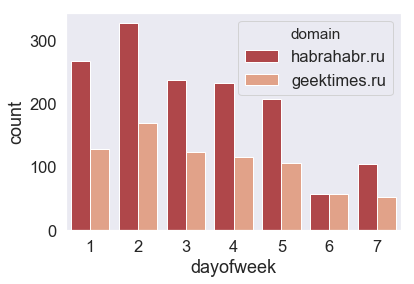

In [44]:
sns.countplot(x='dayofweek', hue='domain', data=year_15[df['month'] == 3]);

In [25]:
# задание 3 - когда лучше всего публиковать статью?

In [26]:
# Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - истина
# Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - ложь

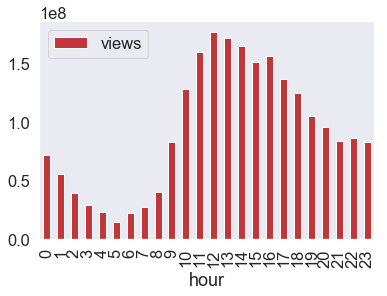

In [27]:
df[['views'] + ['hour']].groupby('hour').sum().plot(kind='bar');

In [28]:
# У опубликованных в 10 утра постов больше всего комментариев - ложь

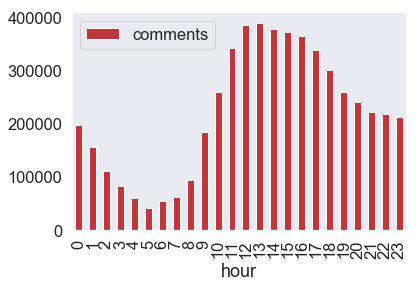

In [29]:
df[['comments'] + ['hour']].groupby('hour').sum().plot(kind='bar');

In [30]:
# Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - ложь. она была опубликована в 2 часа ночи

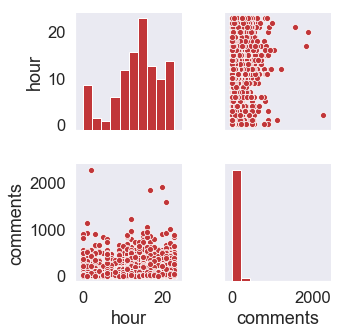

In [31]:
sns.pairplot(df[(df['domain']=='geektimes.ru')][['hour', 'comments']])

In [32]:
# увеличим, чтобы было удобнее рассмотреть

C:\Users\123\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


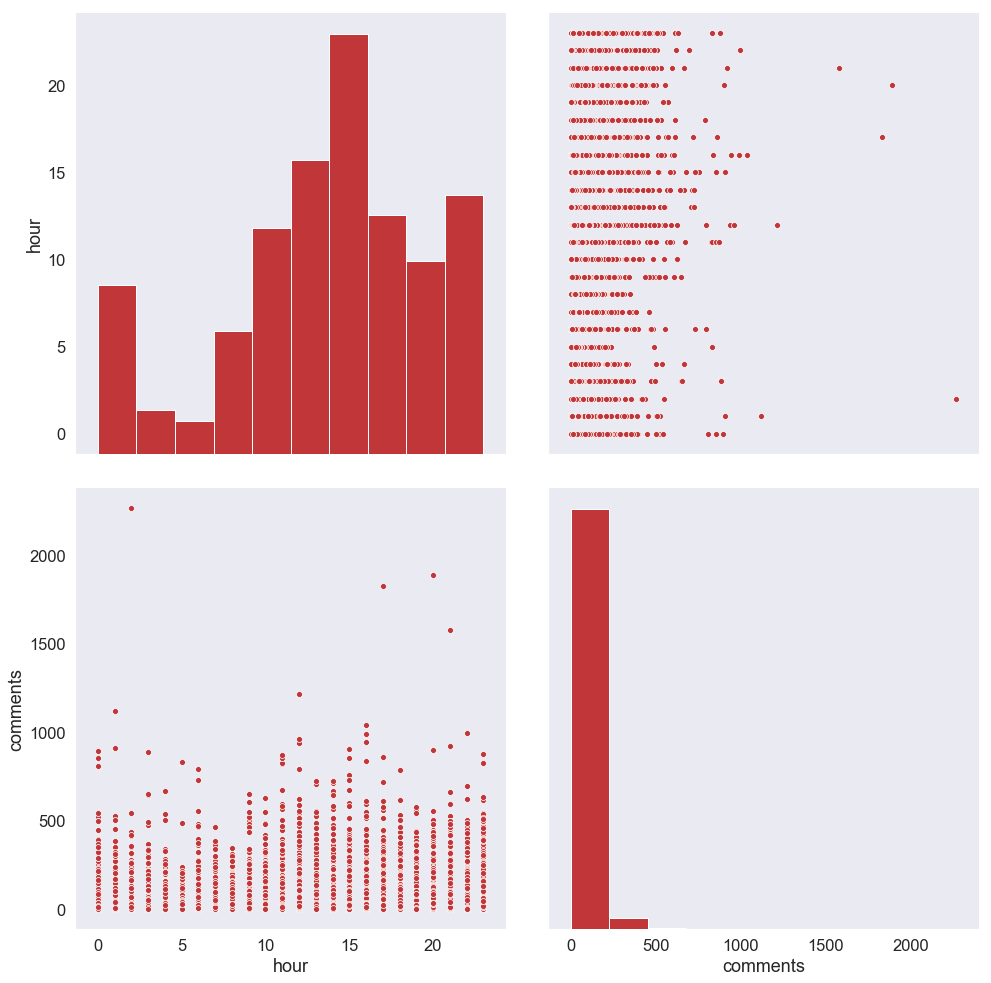

In [33]:
sns.pairplot(df[(df['domain']=='geektimes.ru')][['hour', 'comments']], size=7)

In [34]:
# На хабре дневные статьи комментируют чаще, чем вечерние - истина

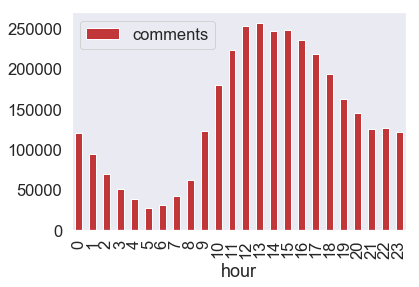

In [35]:
df[(df['domain']=='habrahabr.ru')][['comments'] + ['hour']].groupby('hour').sum().plot(kind='bar');

In [36]:
# задание 4 - видим, что чаще всего минусуют @alizar

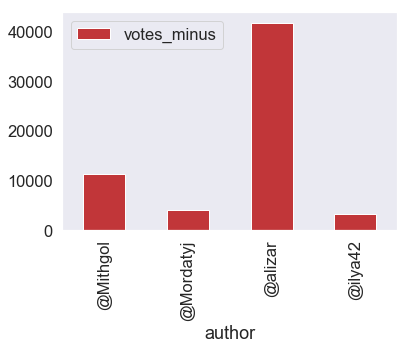

In [37]:
df[(df['author'] == '@Mordatyj' ) | (df['author'] == '@Mithgol' ) | (df['author'] == '@alizar' ) | (df['author'] == '@ilya42' )][['votes_minus'] + ['author']].groupby('author').sum().plot(kind='bar'); 

In [38]:
# задание 5 - Сравните субботы и понедельники

In [39]:
# Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [40]:
# в субботу авторы и правда в дневные часы показатели больше

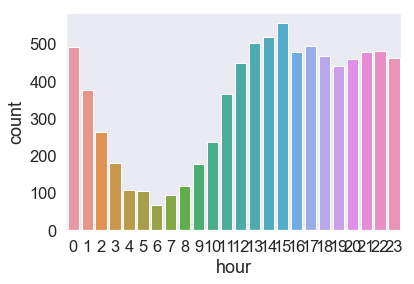

In [41]:
saturday = df[(df['dayofweek'] == 6)]
sns.countplot(saturday['hour'])

In [42]:
# в понедельник дневные показатели тоже выше

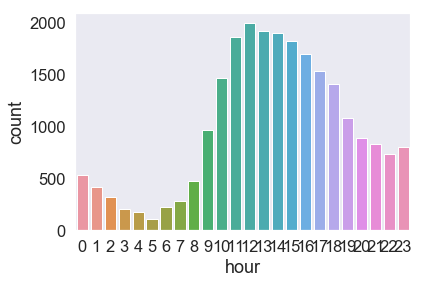

In [43]:
monday = df[(df['dayofweek'] == 1)]
sns.countplot(monday['hour'])